# 1. Introduction
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# 2. Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

ModuleNotFoundError: No module named 'google'

In [ ]:
gender_df = pd.read_csv("/content/gdrive/MyDrive/DataScience-Python/Kaggle-Machine_learning_from_Titanic_Disaster/titanic/gender_submission.csv")
test_df = pd.read_csv("/content/gdrive/MyDrive/DataScience-Python/Kaggle-Machine_learning_from_Titanic_Disaster/titanic/test.csv")
train_df = pd.read_csv("/content/gdrive/MyDrive/DataScience-Python/Kaggle-Machine_learning_from_Titanic_Disaster/titanic/train.csv")

In [ ]:
# dataframe columns
train_cols = train_df.columns
test_cols = test_df.columns

print("Columns of train dataset: ", train_cols)
print("Columns of test dataset: ", test_cols)

Columns of train dataset:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns of test dataset:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Notes:
- `SibSp`: # of sibling / spouses aboard the Titanic
- `Parch`: # of parents / childrens aboard the Titanic
- `Ticket`: Ticket number
- `Cabin`: Cabin number

### Preview Datasets

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### PassengerId
The first column is PassengerId. The ID for a passenger is just the number to identify this passenger in the datasets. So this field is not really part of information that we should care about. We can `drop` this column or `make it the index` for this data set.

In [ ]:
gender_df = pd.read_csv("/content/gdrive/MyDrive/DataScience-Python/Kaggle-Machine_learning_from_Titanic_Disaster/titanic/gender_submission.csv", index_col = "PassengerId")
test_df = pd.read_csv("/content/gdrive/MyDrive/DataScience-Python/Kaggle-Machine_learning_from_Titanic_Disaster/titanic/test.csv", index_col = "PassengerId")
train_df = pd.read_csv("/content/gdrive/MyDrive/DataScience-Python/Kaggle-Machine_learning_from_Titanic_Disaster/titanic/train.csv", index_col = "PassengerId")

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 2.1 FEATURE CLASSIFICATION: CATEGORICAL vs NUMERICAL
* This helps us select the approriate plots for visualization

### Which feature are categorical?
* Categorical feature: `nominal`, `ordinal`, `ratio`, `inteval`
* To classify the sample into sets of simmilar sample


### Which feature are numerical?
* Numerical Feature: `discrete`, `continous`, `timeseries`
* These value change from sample to sample

Train dataset:
  - Age: not enough values (714/891)
  - Cabin: not enough values (204/891)
  - Embarked: not enough values (889/891)

Test dataset:
  - Age: not enough values (332/418)
  - Fare: not enough values (417/418)
  - Cabin: not enough values (91/418)

In [ ]:
train_df.info()
test_df.info()
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

---
* Categorical: `Survived`, `Sex`, `Pclass` (ordinal), `SibSp`, `Parch`, `Embarked`
* Numerical: `Age`, `Fear` (discrete)
* Mix types of date: `Ticket`, `Cabin`
* Contain Eror/Typo: `Name`
* Blank or Null: `Cabin` > `Age` > `Embarked` 
* Various Data Type: Int, Object, Float

** Note: Dtype does not decide the feature of 

---

According to the data dictionary, we know that if a passenger is marked as 1, he or she services. Clearly, the number 1 or 0 is a flag for the person's survivorship. Yet the data type of this column is int64, we can change it into the category types

In [ ]:
train_df["Survived"] = train_df["Survived"].astype("category")

# For better perfomance, I will create function to automatically change type into category
converted_features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
def convertCategory(df, featureList):
    for feature in featureList:
        df[feature] = df[feature].astype("category")

convertCategory(train_df, converted_features)
convertCategory(test_df, converted_features)

### 2.1.1 Distribution of Numerical feature values across the samples

In [ ]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 2.1.2 Distribution of Categorical feature values across the sample

In [ ]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploring Dataset Analysis

Correlating Categorical features
- Categorical: `Survived`, `Sex`, `Pclass` (ordinal), `SibSp`, `Parch`, `Embarked`

## Target Variable: Survived

In [ ]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


# `SEX`


<AxesSubplot:xlabel='Sex', ylabel='count'>

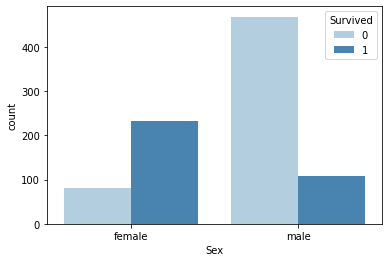

In [ ]:
sns.countplot(data=train_df, x = "Sex", hue="Survived", palette="Blues")

- Remaining categorical feature columns

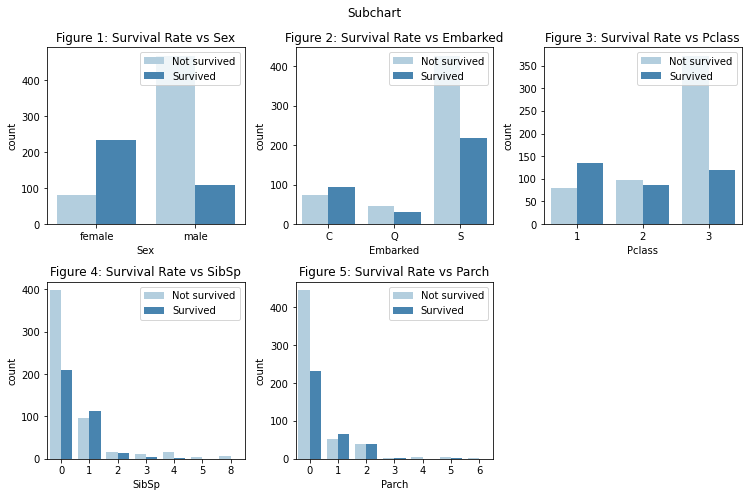

In [ ]:
cols = ["Sex", "Embarked", "Pclass", "SibSp", "Parch"]

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
fig.suptitle("Subchart")

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index to loop through list "cols"
        if (i < len(cols)):
            ax_i = ax[r, c]
            sns.countplot(data=train_df, x = cols[i], hue = "Survived", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title="", loc="upper right", labels=["Not survived", "Survived"])


ax.flat[-1].set_visible(False) # remove the last subplot
plt.tight_layout()
plt.show()

### Observation(Quan sát) of data visualization
**Survivval rate**:
- Fig 1: female survivial rate > male
- Fig 2: most people embarked(lên tàu) on Southampton(S), and also have the highest people not survived 
- Fig 3: 1st class higher survival rate
- Fig 4: people going with `SibSp`=0 are mostly not survived the number ò passenger with SibS=1-2 are have better chance of survivial 
- Fig 5: people going with `Parch`=0 are mostly not survived

# 3.2 EDA for Numerical Features
- Numerical Feature: (continuous) `Age`, `Fare`

**Age**


<AxesSubplot:xlabel='Age', ylabel='Count'>

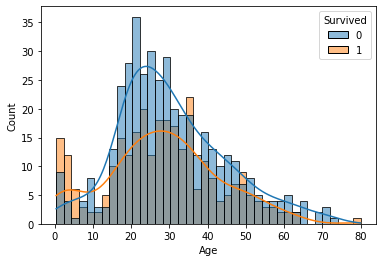

In [ ]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=40, kde=True)

- Majority passenger were from 18-40 ages
- Children had more chance to survive than other ages

**Fare**

In [ ]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

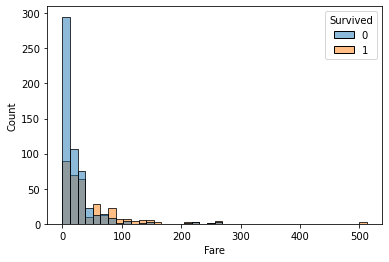

In [ ]:
sns.histplot(data=train_df, x="Fare", hue="Survived", bins=40)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


<AxesSubplot:xlabel='Fare', ylabel='count'>

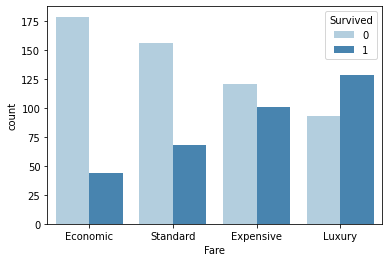

In [ ]:
print(train_df["Fare"].describe())
# To name for 0-25% quartile, 25-50, 50-75, 75-100

fare_categories = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df["Fare"], 4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df["Survived"], palette="Blues")

Distriubution(phân bổ) of Fare:
- Fare does not follow a normal disribution and has a huge spike(mũi nhọn) at price range `[0, 100]`
- The distriubution is skewed(nghiêng) to the left with `75%` of the fare paid under `$31` and max paid fare of `$512`
Quartile plot:
- Passenger with `Luxury` & `Expensive` Fare will have more chance to survive 

# 4. Feature Engineering and Data Wrangling



## Name
- Regular Expression

In [ ]:
train_df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
import re # regular expression

def extract_title(name: str) -> str:
    p = re.compile(",([\w\s]+)\.")
    # if p.search(name):
    #     print(name)
    return p.search(name).group(1).strip()

# create new feature "Title" for "Name"
train_df["Title"] = train_df["Name"].apply(lambda name: extract_title(name))

In [ ]:
train_df[train_df["Name"].str.contains("Mrs. Martin ")]["Name"]

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [ ]:
train_df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
test_df["Title"] = test_df["Name"].apply(lambda name: extract_title(name))
test_df["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
# create function to keep "Title" = ["Mr", "Miss", "Mrs", "Master"] and change other "Title" to "Others"
def group_title(title: str) -> str:
    if title in ["Mr", "Miss", "Mrs", "Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"


# apply group_title function for train and test dataframe
train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title: group_title(title))

<AxesSubplot:xlabel='Title', ylabel='count'>

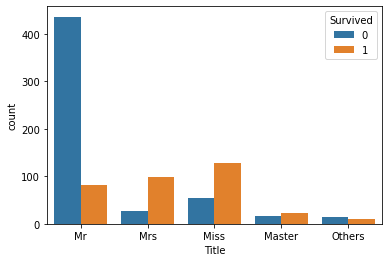

In [ ]:
sns.countplot(data=train_df, x="Title", hue="Survived")

## Family
- `SibSp` and `Parch`

In [ ]:
# Create feature "Family_Size" is the number of members in a family
train_df["Family_Size"] = train_df["SibSp"].astype(int) + train_df["Parch"].astype(int) + 1 
test_df["Family_Size"] = test_df["SibSp"].astype(int) + test_df["Parch"].astype(int) + 1 

Group the feature `Family_Size` into 4 groups:
- `Solo`: 1 member
- `Small`: 2-4 members
- `Medium`: 5-7 members
- `Large`: >= 8 members

In [ ]:
# create feature "Family_Cat" to group the value of "Family_Size" 
train_df["Family_Cat"] = pd.cut(train_df["Family_Size"], bins=[0,1,4,7,20], labels=["Solo", "Small", "Medium", "Large"])
test_df["Family_Cat"] = pd.cut(test_df["Family_Size"], bins=[0,1,4,7,20], labels=["Solo", "Small", "Medium", "Large"])

<AxesSubplot:xlabel='Family_Cat', ylabel='count'>

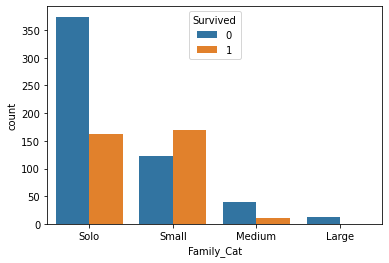

In [ ]:
sns.countplot(data=train_df, x="Family_Cat", hue="Survived")

# 4.2 Data Wrangling(tranh cãi): Chuyển dữ liệu từ thô về dạng để sẵn sàng phân tích
- [Data Cleaning](https://hevodata.com/learn/data-wrangling/)



In [ ]:
# Check again feature collumns
num_feature = ["Age", "Fare"]
cat_feature = ["Sex", "Pclass", "Embarked", "Title", "Family_Cat"]
feature_cols = num_feature + cat_feature

In [ ]:
# create function to show missing collumns
def display_missing(df, feature_cols) -> None:
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"The collumn {col} have {missing_count * 100/n_rows: .2f}% missing value")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

The collumn Age have  19.87% missing value
The collumn Embarked have  0.22% missing value
The collumn Age have  20.57% missing value
The collumn Fare have  0.24% missing value


Filling Missing Value

`Age`
- Filling missing values with `median` of whole dataset (it is not the best choice)

`Fare`, `Embarked`: using `Standard Imputer` in preprocessing class in `Sklearn`

In [ ]:
# Group by the feature "Age" by "Sex" and "Pclass"
age_by_sex_pclass = train_df.groupby(["Sex", "Pclass"]).median()["Age"]
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# Filling the missing value in Age with the medians of "Sex" and "Pclass" groups

train_df["Age"] = train_df.groupby(["Sex", "Pclass"])["Age"].apply(lambda x: x.fillna(x.median()))
test_df["Age"] = test_df.groupby(["Sex", "Pclass"])["Age"].apply(lambda x: x.fillna(x.median()))

In [ ]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

The collumn Embarked have  0.22% missing value
The collumn Fare have  0.24% missing value


In [ ]:
X = train_df[feature_cols]
y = train_df["Survived"]

In [ ]:
X_test = test_df[feature_cols]

In [ ]:
# preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # filling the missing value of the feature by Simple Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="median")), # filling missing value with median value
    ("scale", StandardScaler()) # scale the data in the same scale
])
cat_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="most_frequent")), # filling missing value with the most frequent(thường xuyên) value
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # change the string value into numerical value
])

In [ ]:
# define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_feature),
    ("cat", cat_transformer, cat_feature)
])

In [ ]:
# fit the preprocessor to the X
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [ ]:
X = preprocessor.transform(X)

# 5. Model Training




Split the X into the X_test and X_val dataset
- `X_train`: premodel
- `X_val`: validate the model performance

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split X and y
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, train_size=0.8)
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
# binary classification 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
log_reg = LogisticRegression(solver="liblinear", max_iter=100)
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.8156424581005587

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7121212121212122, 0.7704918032786885)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       118
           1       0.71      0.77      0.74        61

    accuracy                           0.82       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



**Training `Linear model` with `Polynomial Features`**
$$ y = ax_1 + bx_2 + bias + => y = ax_1^2 + bx_2^2 + cx_1x_2 + bias$$


In [ ]:
poly = PolynomialFeatures(degree=2)
poly_feature_X_train = poly.fit_transform(X_train)
poly_feature_X_val = poly.transform(X_val)

In [ ]:
poly_log_reg = LogisticRegression(solver="liblinear", max_iter=100)
poly_log_reg.fit(poly_feature_X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
poly_log_reg.score(poly_feature_X_train, y_train)

0.8609550561797753